In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
#from pandas.plotting.scatter_matrix import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set (style = "white")
sns.set (style = "whitegrid",color_codes = True)
%matplotlib inline

# The _spotify_ data

In [2]:
songs = pd.read_csv("data.csv")

songs.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf0 in position 3: invalid continuation byte

In [9]:
songs.info()
songs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [6]:
songs['target'].value_counts()

1    1020
0     997
Name: target, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


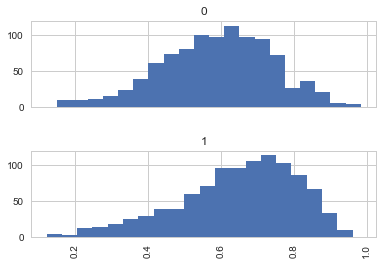

In [7]:

ax = songs.hist(column='danceability', by='target', bins=20, layout=(2,1), sharex=True, sharey=True)

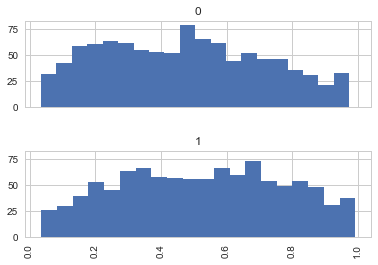

In [8]:

ax = songs.hist(column='valence', by='target', bins=20, layout=(2,1), sharex=True, sharey=True)

In [11]:
#scatter = scatter_matrix(songs, figsize=(12, 8), diagonal='hist')
train, test = split(songs, test_size = 0.3, 
                                random_state=12121)
train = train.ix[:, ['duration_ms', 'valence', 'danceability','liveness','loudness','tempo','speechiness','target']]
test = test.ix[:, ['duration_ms', 'valence', 'danceability','liveness','loudness','tempo','speechiness','target']]
train.describe()
#scatter = scatter_matrix(train, figsize=(12, 8), diagonal='hist')


C:\Users\Miriyi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\Miriyi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


,duration_ms,valence,danceability,liveness,loudness,tempo,speechiness,target
count,1.411000e+03,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000
mean,2.466946e+05,0.496593,0.619012,0.192457,-7.118147,121.631688,0.093470,0.511694
std,8.399534e+04,0.251411,0.159700,0.154943,3.742251,26.707139,0.092906,0.500040
min,1.604200e+04,0.034800,0.123000,0.021900,-33.097000,59.385000,0.023200,0.000000
25%,2.002000e+05,0.291500,0.514000,0.093050,-8.545000,100.587500,0.036900,0.000000
50%,2.300000e+05,0.489000,0.633000,0.128000,-6.351000,121.000000,0.054000,1.000000
75%,2.687105e+05,0.692000,0.737000,0.248000,-4.751000,137.872000,0.108000,1.000000
max,1.004627e+06,0.992000,0.984000,0.953000,-0.307000,219.331000,0.816000,1.000000


C:\Users\Miriyi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


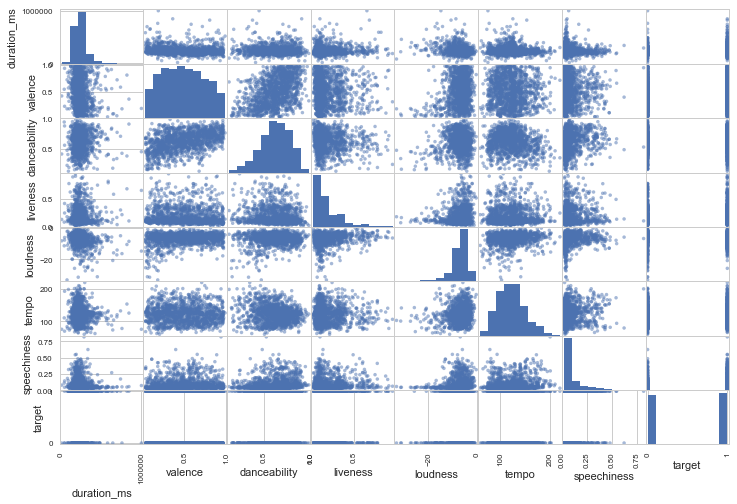

In [12]:
scatter = scatter_matrix(train, figsize=(12, 8), diagonal='hist')

# Duration MS

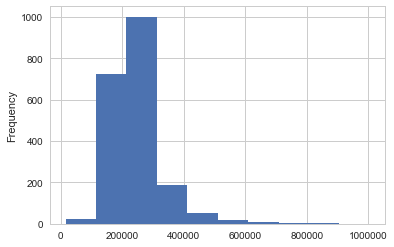

In [19]:
songs.duration_ms.plot.hist(bins=10)

In [13]:
#Fit to  the decision tree model 
dt = DecisionTreeClassifier(max_depth=5,
                                   min_samples_split=10,
                                   min_samples_leaf=10)
X = train.drop('target', axis=1)
y = train.target
dt.fit(X, y)
# Assest the model 
train['pred'] = dt.predict(X)
print ("DT features importance ")
print (pd.Series(dt.feature_importances_,
          index=X.columns))
cm = confusion_matrix(y_true=train.target,
                      y_pred=train.pred)
print ( '********** DC confusion matrix (train)*************')
print (pd.DataFrame(cm,
             index=dt.classes_,
             columns=dt.classes_))

print ('accuracy(train):' , accuracy_score(y_true=train.target, y_pred=train.pred))
print ( '********** DC classification report (train) *************')
print (classification_report(y_true=train.target,
                            y_pred=train.pred))

# Validate the model on test 
X = test.drop('target', axis=1)
y = test.target
test['pred'] = dt.predict(X)
print ('accuracy(test):' , accuracy_score(y_true=test.target, y_pred=test.pred))
print ( '********** DC classification report (test) *************')
print (classification_report(y_true=test.target,
                            y_pred=test.pred))

DT features importance 
duration_ms     0.273031
valence         0.073148
danceability    0.037975
liveness        0.012675
loudness        0.372169
tempo           0.007908
speechiness     0.223094
dtype: float64
********** DC confusion matrix (train)*************
     0    1
0  530  159
1  218  504
accuracy(train): 0.7328136073706591
********** DC classification report (train) *************
             precision    recall  f1-score   support

          0       0.71      0.77      0.74       689
          1       0.76      0.70      0.73       722

avg / total       0.73      0.73      0.73      1411

accuracy(test): 0.6600660066006601
********** DC classification report (test) *************
             precision    recall  f1-score   support

          0       0.66      0.69      0.67       308
          1       0.66      0.63      0.64       298

avg / total       0.66      0.66      0.66       606



What can we learn the mean and variance of the distributions?

C:\Users\Miriyi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Miriyi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


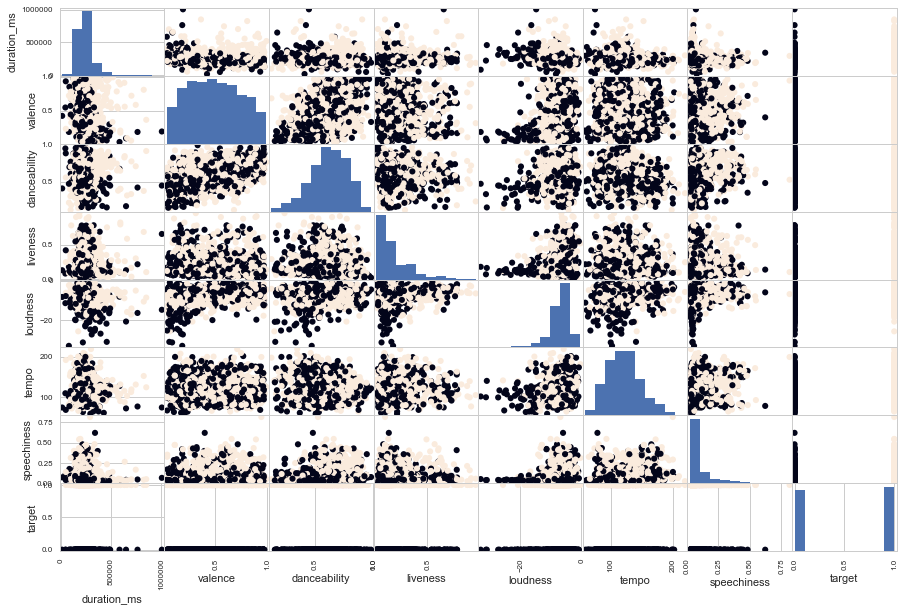

In [102]:
scatter = scatter_matrix(train.ix[:, :8], 
                         figsize=(15, 10), 
                         c=train['target'],
                         alpha=1,
                         s=150)

# Lets try logistic regression 

In [103]:
train.head()
train['target'].value_counts()

1    722
0    689
Name: target, dtype: int64

             precision    recall  f1-score   support

          0       0.54      0.54      0.54       308
          1       0.53      0.53      0.53       298

avg / total       0.54      0.54      0.54       606



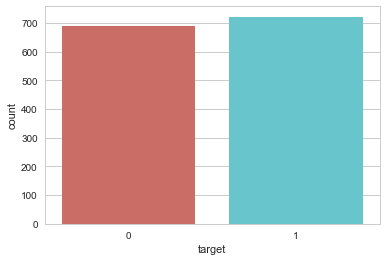

In [28]:

sns.countplot (x='target',data = train,palette = 'hls')
plt.show

lr = LogisticRegression().fit(X, y)

X.head()
X['pred'] = lr.predict(X) 

cmat = confusion_matrix(y_true=y, 
                        y_pred=X['pred'], 
                        labels=lr.classes_)
pd.DataFrame(cmat, 
             index=lr.classes_, 
             columns=lr.classes_)

print(classification_report(y,X['pred']))

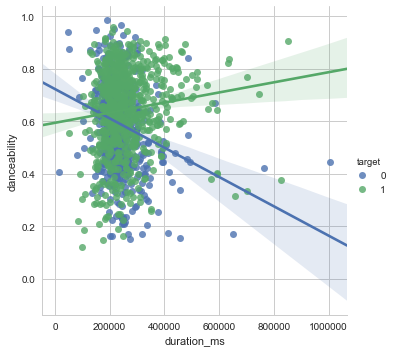

In [105]:
sns.lmplot(x= 'duration_ms', y ='danceability' ,hue = 'target',data = train)

## Accuracy

Accuracy is the most intuitive measure of classification quality, and it describes what part of our classifications was correct, and it is calculated directly by the _accuracy_\__score()_ function from the _sklearn.metrics_ module.

In [18]:
for colname, th in th_dict.items():
    print(colname, " -- Threshold:", th, "\n--------------")
    accuracy = accuracy_score(y_true=radar['Type'], 
                              y_pred=radar[colname])
    print(accuracy, '\n')

Planes are important  -- Threshold: 0.5 
--------------
0.47333592837680033 

Reasonable  -- Threshold: 2.4 
--------------
0.8781627092253795 

Birds are important  -- Threshold: 3.2 
--------------
0.8372907746204749 



> **NOTE:** Accuracy has an important drawback which is its bad interpretation for unbalanced classes. We will explore this further in the chapter about imbalanced data.

## Precision, recall & F1

Precision and recall are measures of complementary business goals. **Precision** describes what fraction of the items the classifier flags as being in the class are actually in the class, and **recall** describes what fraction of the items in the class are detected by the classifier. It worth mentioning that in terms of the confusion matrix, precision deals with a single **column**, while recall deals with a single **row**, and both of them refer to a specific category, which is usually regarded as the **positive**.

Very often there is a trade-off between precision and recall, where one of them can be improved by sacrificing the other. The **F1** measure is a combination of them, and it is usually used as such.

All these measures are of course available in scikit-learn. Note that since they are not symmetrical measures, their computation requires an additional argument called _pos_\__label_.

In [20]:
s = "\tPrecision: {:.2f}\n\tRecall: {:.2f}\n\tF1: {:.2f}\n"
for colname, th in th_dict.items():
    precision = precision_score(y_true=radar['Type'], 
                                y_pred=radar[colname], 
                                pos_label='Plane')
    recall = recall_score(y_true=radar['Type'], 
                          y_pred=radar[colname], 
                          pos_label='Plane')
    f1 = f1_score(radar['Type'], 
                  radar[colname], 
                  pos_label='Plane')
    print(colname, " -- Threshold:", th, "\n--------------")
    print(s.format(precision, recall, f1))

Planes are important  -- Threshold: 0.5 
--------------
	Precision: 0.47
	Recall: 0.98
	F1: 0.64

Reasonable  -- Threshold: 2.4 
--------------
	Precision: 0.95
	Recall: 0.79
	F1: 0.86

Birds are important  -- Threshold: 3.2 
--------------
	Precision: 1.00
	Recall: 0.66
	F1: 0.79



### Classification report

Due to their usefulness, these measures are summarized in a special report available by the _classification_\__report()_ function.

In [22]:
for colname, th in th_dict.items():
    print(colname, " -- Threshold:", th, "\n--------------")
    print(classification_report(y_true=radar['Type'], 
                                y_pred=radar[colname]), '\n')

Planes are important  -- Threshold: 0.5 
--------------
             precision    recall  f1-score   support

       Bird       0.52      0.02      0.04      1355
      Plane       0.47      0.98      0.64      1214

avg / total       0.50      0.47      0.32      2569
 

Reasonable  -- Threshold: 2.4 
--------------
             precision    recall  f1-score   support

       Bird       0.83      0.96      0.89      1355
      Plane       0.95      0.79      0.86      1214

avg / total       0.89      0.88      0.88      2569
 

Birds are important  -- Threshold: 3.2 
--------------
             precision    recall  f1-score   support

       Bird       0.76      1.00      0.87      1355
      Plane       1.00      0.66      0.79      1214

avg / total       0.88      0.84      0.83      2569
 



## Sensitivity & specificity

Sensitivity versus specificity is a very common comparison in the practical jargon as a similar "competitor" for the recall-precision assessment.

> **Your turn 1:** In this exercise we will construct three intuitive classifiers for predicting the sex of a person based on his/her height and weight. For that end we will use the data in the file weight.txt.

> * Create and assess a classification model based on a single weight threshold.
> * Create and assess a classification model based on thresholds for both the height and the weight.
> * Create and assess a classification model based on a line that reasonably separates between the males and females.

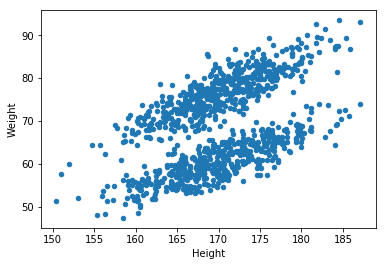

In [5]:
w = pd.read_csv('C:\\DS\\02 - Classification\\01 - Introduction to classification\\weight.txt')
w.plot. scatter(x='Height', y='Weight')

In [6]:
w.head()


,Sex,Age,Height,Weight
0,f,26,171.1,57.0
1,m,44,180.1,84.7
2,m,32,161.9,73.6
3,m,27,176.5,81.0
4,f,26,167.3,57.4


In [9]:

w['Sex'].value_counts()

m    527
f    473
Name: Sex, dtype: int64

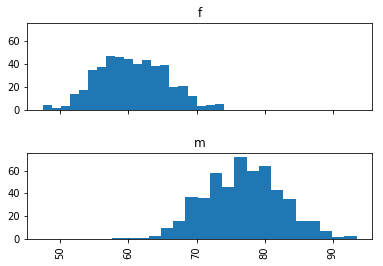

In [10]:
ax = w.hist(column='Weight', by='Sex', bins=20, layout=(2,1), sharex=True, sharey=True)

In [11]:
 w['w_pred'] = np.where(w.Weight > 65, 
                              'm', 'f')

In [12]:
w.head()


,Sex,Age,Height,Weight,w_pred
0,f,26,171.1,57.0,f
1,m,44,180.1,84.7,m
2,m,32,161.9,73.6,m
3,m,27,176.5,81.0,m
4,f,26,167.3,57.4,f


In [13]:
cm = confusion_matrix(y_true=w['Sex'], 
                          y_pred=w['w_pred'], 
                          labels=['m', 'f'])

In [15]:
cm = pd.DataFrame(cm, index=['m', 'f'], columns=['m', 'f'])
print (cm)

     m    f
m  521    6
f   88  385


In [17]:
accuracy = accuracy_score(y_true=w['Sex'], 
                              y_pred=w['w_pred'])
print (accuracy)                                       

0.906


In [18]:
precision = precision_score(y_true=w['Sex'], 
                                y_pred=w['w_pred'], 
                                pos_label='m')
recall = recall_score(y_true=w['Sex'], 
                          y_pred=w['w_pred'], 
                          pos_label='m')
f1 = f1_score(w['Sex'], 
                  w['w_pred'], 
                  pos_label='m')

In [19]:
s = "\tPrecision: {:.2f}\n\tRecall: {:.2f}\n\tF1: {:.2f}\n"
print(s.format(precision, recall, f1))

	Precision: 0.86
	Recall: 0.99
	F1: 0.92



In [20]:
print(classification_report(y_true=w['Sex'], 
                            y_pred=w['w_pred']))

             precision    recall  f1-score   support

          f       0.98      0.81      0.89       473
          m       0.86      0.99      0.92       527

avg / total       0.92      0.91      0.90      1000

